In [ ]:
!pip install pandas

   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
    ----------------


[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import pandas as pd

df = pd.read_csv(r"C:\Users\jeni7\OneDrive\Documents\CTS_Hackathon\dataset\dataset.csv")

df.head()

,age,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,medical_specialty,diag_1,diag_2,diag_3,glucose_test,A1Ctest,change,diabetes_med,readmitted
0,[70-80),8,72,1,18,2,0,0,Missing,Circulatory,Respiratory,Other,no,no,no,yes,no
1,[70-80),3,34,2,13,0,0,0,Other,Other,Other,Other,no,no,no,yes,no
2,[50-60),5,45,0,18,0,0,0,Missing,Circulatory,Circulatory,Circulatory,no,no,yes,yes,yes
3,[70-80),2,36,0,12,1,0,0,Missing,Circulatory,Other,Diabetes,no,no,yes,yes,yes
4,[60-70),1,42,0,7,0,0,0,InternalMedicine,Other,Circulatory,Respiratory,no,no,no,yes,no


In [ ]:
print(df.columns)

Index(['age', 'time_in_hospital', 'n_lab_procedures', 'n_procedures',
       'n_medications', 'n_outpatient', 'n_inpatient', 'n_emergency',
       'medical_specialty', 'diag_1', 'diag_2', 'diag_3', 'glucose_test',
       'A1Ctest', 'change', 'diabetes_med', 'readmitted'],
      dtype='object')


In [20]:
# Identify numeric columns
numeric_features = df.select_dtypes(include=np.number).columns.tolist()

# Fill missing values with median
for col in numeric_features:
    df[col] = df[col].fillna(df[col].median())

In [19]:
# 1️⃣ Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils.class_weight import compute_class_weight

# 2️⃣ Load Dataset
df = pd.read_csv(r"C:\Users\jeni7\OneDrive\Documents\CTS_Hackathon\dataset\dataset.csv")

# Inspect dataset
print(df.head())
print(df.info())
print(df['readmitted'].value_counts())


       age  time_in_hospital  n_lab_procedures  n_procedures  n_medications  \
0  [70-80)                 8                72             1             18   
1  [70-80)                 3                34             2             13   
2  [50-60)                 5                45             0             18   
3  [70-80)                 2                36             0             12   
4  [60-70)                 1                42             0              7   

   n_outpatient  n_inpatient  n_emergency medical_specialty       diag_1  \
0             2            0            0           Missing  Circulatory   
1             0            0            0             Other        Other   
2             0            0            0           Missing  Circulatory   
3             1            0            0           Missing  Circulatory   
4             0            0            0  InternalMedicine        Other   

        diag_2       diag_3 glucose_test A1Ctest change diabetes_med

In [20]:
# Identify numeric columns
numeric_features = df.select_dtypes(include=np.number).columns.tolist()

# Fill missing values in numeric columns with median
for col in numeric_features:
    df[col] = df[col].fillna(df[col].median())

# Optional: check result
print(df[numeric_features].isnull().sum())


time_in_hospital    0
n_lab_procedures    0
n_procedures        0
n_medications       0
n_outpatient        0
n_inpatient         0
n_emergency         0
dtype: int64


In [21]:
# Identify categorical columns (excluding target)
categorical_features = df.select_dtypes(include='object').columns.tolist()
categorical_features.remove('readmitted')

# Fill missing categorical values with 'Unknown'
for col in categorical_features:
    df[col] = df[col].fillna('Unknown')

# One-hot encode categorical features
df = pd.get_dummies(df, columns=categorical_features)

# Optional: check result
print(df.head())


   time_in_hospital  n_lab_procedures  n_procedures  n_medications  \
0                 8                72             1             18   
1                 3                34             2             13   
2                 5                45             0             18   
3                 2                36             0             12   
4                 1                42             0              7   

   n_outpatient  n_inpatient  n_emergency readmitted  age_[40-50)  \
0             2            0            0         no        False   
1             0            0            0         no        False   
2             0            0            0        yes        False   
3             1            0            0        yes        False   
4             0            0            0         no        False   

   age_[50-60)  ...  glucose_test_high  glucose_test_no  glucose_test_normal  \
0        False  ...              False             True                False   
1   

In [22]:
# Initialize scaler
scaler = StandardScaler()

# Scale numeric features
df[numeric_features] = scaler.fit_transform(df[numeric_features])

# Optional: check result
print(df[numeric_features].head())


   time_in_hospital  n_lab_procedures  n_procedures  n_medications  \
0          1.181671          1.451151     -0.205440       0.216814   
1         -0.484212         -0.466276      0.377601      -0.403505   
2          0.182141          0.088769     -0.788481       0.216814   
3         -0.817389         -0.365359     -0.788481      -0.527569   
4         -1.150566         -0.062607     -0.788481      -1.147888   

   n_outpatient  n_inpatient  n_emergency  
0      1.366510    -0.522918    -0.210644  
1     -0.306494    -0.522918    -0.210644  
2     -0.306494    -0.522918    -0.210644  
3      0.530008    -0.522918    -0.210644  
4     -0.306494    -0.522918    -0.210644  


In [24]:
print("Unique values in y:", y.unique())
print("Value counts:\n", y.value_counts(dropna=False))
print("Any NaNs in y?", y.isnull().sum())



Unique values in y: [nan]
Value counts:
 readmitted
NaN    25000
Name: count, dtype: int64
Any NaNs in y? 25000


In [25]:
# Map 3 classes into binary: 0 = Not readmitted, 1 = Readmitted
y = df['readmitted'].map({
    'NO': 0,
    '>30': 1,
    '<30': 1
})


In [27]:
# Map: 0 = Not readmitted, 1 = Readmitted
y = df['readmitted'].map({
    'NO': 0,
    '<30': 1,
    '>30': 1
})

# Drop rows where mapping failed (NaN values)
mask = y.notnull()
X = X[mask]
y = y[mask]

print("Final class distribution:\n", y.value_counts())



Final class distribution:
 Series([], Name: count, dtype: int64)


In [30]:
print(df['readmitted'].unique())
print(df['readmitted'].value_counts(dropna=False))


['no' 'yes']
readmitted
no     13246
yes    11754
Name: count, dtype: int64


In [31]:
# Suppose unique values are ['NO', '<30', '>30']
y = df['readmitted'].map({
    'NO': 0,   # Not readmitted
    '<30': 1,  # Readmitted within 30 days
    '>30': 1   # Readmitted after 30 days
})


In [32]:
mask = y.notnull()
X = X[mask]
y = y[mask]


C:\Users\jeni7\AppData\Local\Temp\ipykernel_27580\3972458298.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  X = X[mask]


In [33]:
# Step 1: Check actual labels in readmitted
print(df['readmitted'].unique())
print(df['readmitted'].value_counts(dropna=False))


['no' 'yes']
readmitted
no     13246
yes    11754
Name: count, dtype: int64


In [34]:
y = df['readmitted'].map({
    'NO': 0,
    '<30': 1,
    '>30': 1
})


In [36]:
# Check what unique labels are in readmitted
print("Unique labels in raw data:", df['readmitted'].unique())
print("\nValue counts including NaN:\n", df['readmitted'].value_counts(dropna=False).head(20))



Unique labels in raw data: ['no' 'yes']

Value counts including NaN:
 readmitted
no     13246
yes    11754
Name: count, dtype: int64


In [37]:
df['readmitted'] = df['readmitted'].astype(str).str.strip().str.upper()
print("Normalized unique labels:", df['readmitted'].unique())


Normalized unique labels: ['NO' 'YES']


In [38]:
y = df['readmitted'].map({
    'NO': 0,
    '<30': 1,
    '>30': 1,
    'YES': 1   # if it exists
})


In [39]:
mask = y.notnull()
X = X[mask]
y = y[mask]
print("Final dataset size:", len(y))


Final dataset size: 25000


C:\Users\jeni7\AppData\Local\Temp\ipykernel_27580\559729509.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  X = X[mask]


In [40]:
# Inspect the unique values in target column
print("Unique labels in raw data:", df['readmitted'].unique())
print("\nValue counts:\n", df['readmitted'].value_counts(dropna=False))


Unique labels in raw data: ['NO' 'YES']

Value counts:
 readmitted
NO     13246
YES    11754
Name: count, dtype: int64


In [41]:
# Convert everything to uppercase and strip spaces
df['readmitted'] = df['readmitted'].astype(str).str.strip().str.upper()

print("Normalized unique labels:", df['readmitted'].unique())


Normalized unique labels: ['NO' 'YES']


In [42]:
# Binary classification: Not readmitted (0) vs Readmitted (1)
y = df['readmitted'].map({
    'NO': 0,
    '<30': 1,
    '>30': 1
})

# Drop NaNs if some labels didn’t match
mask = y.notnull()
X = X[mask]
y = y[mask]

print("Final class distribution:\n", y.value_counts())


Final class distribution:
 readmitted
0.0    13246
Name: count, dtype: int64


C:\Users\jeni7\AppData\Local\Temp\ipykernel_27580\3563391464.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  X = X[mask]


In [44]:
# Map target to binary
y = df['readmitted'].map({
    'NO': 0,
    '<30': 1,
    '>30': 1
})

# Apply the same mask to X and y
mask = y.notnull()
X = df.drop('readmitted', axis=1)[mask]
y = y[mask]

print("Final X shape:", X.shape)
print("Final y shape:", y.shape)
print("Class distribution:\n", y.value_counts())


Final X shape: (13246, 54)
Final y shape: (13246,)
Class distribution:
 readmitted
0.0    13246
Name: count, dtype: int64


In [45]:
from sklearn.model_selection import train_test_split

X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp
)

print("Train shape:", X_train.shape)
print("Validation shape:", X_val.shape)
print("Test shape:", X_test.shape)


Train shape: (9272, 54)
Validation shape: (1987, 54)
Test shape: (1987, 54)


In [47]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# Compute class weights
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)

# Convert to dictionary
class_weights = dict(enumerate(class_weights))

print("Class Weights:", class_weights)



Class Weights: {0: 1.0}


In [48]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# Compute class weights to handle imbalance
class_weights_array = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)

class_weights = dict(enumerate(class_weights_array))
print("Class Weights:", class_weights)


Class Weights: {0: 1.0}


In [49]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

input_dim = X_train.shape[1]

mlp_model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(input_dim,)),
    layers.Dropout(0.3),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

mlp_model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy', keras.metrics.Precision(), keras.metrics.Recall()]
)

history = mlp_model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=20,
    batch_size=32,
    class_weight=class_weights,
    verbose=1
)


c:\Users\jeni7\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
290/290 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.9706 - loss: 0.1135 - precision_1: 0.0000e+00 - recall_1: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 2.6259e-05 - val_precision_1: 0.0000e+00 - val_recall_1: 0.0000e+00
Epoch 2/20
290/290 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 1.0000 - loss: 9.1183e-05 - precision_1: 0.0000e+00 - recall_1: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 4.7885e-06 - val_precision_1: 0.0000e+00 - val_recall_1: 0.0000e+00
Epoch 3/20
290/290 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 1.0000 - loss: 2.8104e-05 - precision_1: 0.0000e+00 - recall_1: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 1.7750e-06 - val_precision_1: 0.0000e+00 - val_recall_1: 0.0000e+00
Epoch 4/20
290/290 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 1.0000 - loss: 1.2760e-05 - precision_1: 0.0000e+00 - recall_1: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 8.1210e-07 - val_precision_1: 0.0000e+00 - val_recall_1: 0.0000e+00
Epoch 5/20
290/290 ━━━━━━━━━━━━━━━━

In [10]:
# Identify categorical columns
categorical_features = X.select_dtypes(include='object').columns.tolist()

# One-hot encode categorical columns
X = pd.get_dummies(X, columns=categorical_features, drop_first=True)

print("New feature matrix shape:", X.shape)


New feature matrix shape: (13246, 45)


In [11]:
from sklearn.model_selection import train_test_split

X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp
)


In [12]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

class_weights_array = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)
class_weights = dict(enumerate(class_weights_array))
print("Class Weights:", class_weights)


Class Weights: {0: 1.0}


In [14]:
# Convert all columns to float32
X_train = X_train.astype('float32')
X_val = X_val.astype('float32')
X_test = X_test.astype('float32')

# Ensure target is int
y_train = y_train.astype('int')
y_val = y_val.astype('int')
y_test = y_test.astype('int')


In [15]:

print("X_train dtype:", X_train.dtypes)
print("y_train dtype:", y_train.dtype)
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)



X_train dtype: time_in_hospital                            float32
n_lab_procedures                            float32
n_procedures                                float32
n_medications                               float32
n_outpatient                                float32
n_inpatient                                 float32
n_emergency                                 float32
age_[50-60)                                 float32
age_[60-70)                                 float32
age_[70-80)                                 float32
age_[80-90)                                 float32
age_[90-100)                                float32
medical_specialty_Emergency/Trauma          float32
medical_specialty_Family/GeneralPractice    float32
medical_specialty_InternalMedicine          float32
medical_specialty_Missing                   float32
medical_specialty_Other                     float32
medical_specialty_Surgery                   float32
diag_1_Diabetes                             float

In [24]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)
class_weights = dict(enumerate(class_weights))
print("Class Weights:", class_weights)


Class Weights: {0: 0.9436187780136824, 1: 1.0635469290082424}


In [25]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)


In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam

mlp_model = Sequential([
    Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

mlp_model.compile(
    optimizer=Adam(learning_rate=0.0005),
    loss='binary_crossentropy',
    metrics=['accuracy']
)


c:\Users\jeni7\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [27]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = mlp_model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=100,  # longer training
    batch_size=32,
    class_weight=class_weights,
    callbacks=[early_stop],
    verbose=1
)


Epoch 1/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.5717 - loss: 0.6752 - val_accuracy: 0.6110 - val_loss: 0.6592
Epoch 2/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.5985 - loss: 0.6618 - val_accuracy: 0.6170 - val_loss: 0.6547
Epoch 3/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.6113 - loss: 0.6551 - val_accuracy: 0.6087 - val_loss: 0.6575
Epoch 4/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.6130 - loss: 0.6532 - val_accuracy: 0.6185 - val_loss: 0.6545
Epoch 5/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6126 - loss: 0.6530 - val_accuracy: 0.6190 - val_loss: 0.6541
Epoch 6/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.6144 - loss: 0.6539 - val_accuracy: 0.6183 - val_loss: 0.6554
Epoch 7/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6156 - loss: 0.6495 - val_accuracy: 0.6130 - val_loss: 0.6545
Epoch 8/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6222 - loss: 0.6481 - val_accu

In [28]:
from sklearn.metrics import classification_report

y_pred = (mlp_model.predict(X_test) > 0.5).astype(int)
print(classification_report(y_test, y_pred))


157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
              precision    recall  f1-score   support

           0       0.63      0.69      0.66      2649
           1       0.61      0.53      0.57      2351

    accuracy                           0.62      5000
   macro avg       0.62      0.61      0.61      5000
weighted avg       0.62      0.62      0.62      5000



In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam

mlp_model = Sequential([
    Dense(256, activation='relu', input_shape=(X_train.shape[1],)),  # bigger first layer
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

mlp_model.compile(
    optimizer=Adam(learning_rate=0.0005),  # smaller LR for stable training
    loss='binary_crossentropy',
    metrics=['accuracy']
)


c:\Users\jeni7\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [30]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)
class_weights = dict(enumerate(class_weights))
print("Class Weights:", class_weights)


Class Weights: {0: 0.9436187780136824, 1: 1.0635469290082424}


In [31]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = mlp_model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=100,
    batch_size=32,
    class_weight=class_weights,
    callbacks=[early_stop],
    verbose=1
)


Epoch 1/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.5744 - loss: 0.6747 - val_accuracy: 0.6053 - val_loss: 0.6629
Epoch 2/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6062 - loss: 0.6574 - val_accuracy: 0.6058 - val_loss: 0.6600
Epoch 3/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6157 - loss: 0.6546 - val_accuracy: 0.6148 - val_loss: 0.6547
Epoch 4/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6046 - loss: 0.6581 - val_accuracy: 0.6102 - val_loss: 0.6555
Epoch 5/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6156 - loss: 0.6539 - val_accuracy: 0.6177 - val_loss: 0.6547
Epoch 6/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6118 - loss: 0.6537 - val_accuracy: 0.6145 - val_loss: 0.6545
Epoch 7/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6092 - loss: 0.6534 - val_accuracy: 0.6100 - val_loss: 0.6557
Epoch 8/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6236 - loss: 0.6465 - val_accu

In [33]:
y_pred_prob = mlp_model.predict(X_test).flatten()
y_pred = (y_pred_prob > 0.5).astype(int)


157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [34]:
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)


157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Classification Report:

              precision    recall  f1-score   support

           0       0.62      0.66      0.64      2649
           1       0.59      0.55      0.57      2351

    accuracy                           0.61      5000
   macro avg       0.61      0.61      0.61      5000
weighted avg       0.61      0.61      0.61      5000



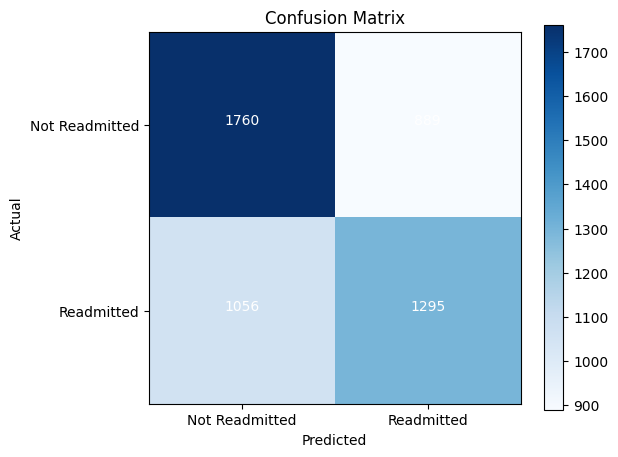

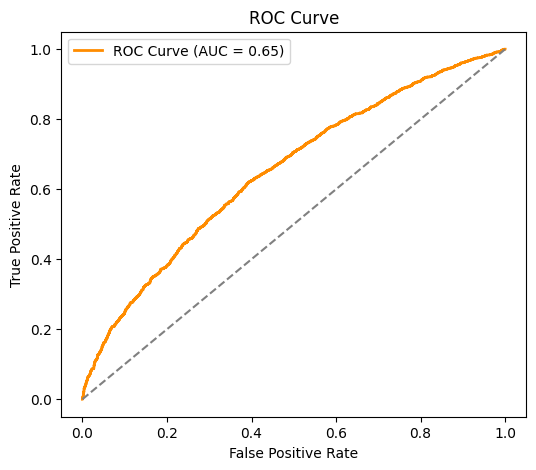

In [42]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import numpy as np

# 1️⃣ Predictions
y_pred_prob = mlp_model.predict(X_test).flatten()  # probabilities
y_pred = (y_pred_prob > 0.5).astype(int)          # binary predictions

# 2️⃣ Classification Report
print("Classification Report:\n")
print(classification_report(y_test, y_pred))

# 3️⃣ Confusion Matrix (Matplotlib only)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
plt.xticks([0,1], ["Not Readmitted","Readmitted"])
plt.yticks([0,1], ["Not Readmitted","Readmitted"])

# Annotate numbers in each cell
thresh = cm.max() / 2.
for i, j in np.ndindex(cm.shape):
    plt.text(j, i, cm[i, j],
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# 4️⃣ ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})', color='darkorange', lw=2)
plt.plot([0,1],[0,1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


In [53]:
from sklearn.metrics import accuracy_score

# Compute accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.4f}")


Test Accuracy: 0.5054
